# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Writting down Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Importing the OpenWeatherMap API key
from api_keys import weather_api_key

# Importing citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Printing the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Setting the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Defining an empty list to fetch the weather data for each city
city_data = []

# Printing to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Creating counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Grouping cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Creating endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"# YOUR CODE HERE

    # Logging the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Running an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | ta`u
Processing Record 3 of Set 1 | bubaque
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | thunder bay
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | port-vila
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | whitby
Processing Record 12 of Set 1 | port augusta
Processing Record 13 of Set 1 | baracoa
Processing Record 14 of Set 1 | sola
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | west bay
Processing Record 17 of Set 1 | vadso
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | eregli
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | buckhannon
Processing Record 23 of Set 1 | ugoofaa

In [9]:
# Converting the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()



City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [10]:
# Displaying sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,56.55,65,100,3.44,US,1731377142
1,ta`u,-14.2336,-169.5144,81.30,72,39,11.36,AS,1731377144
2,bubaque,11.2833,-15.8333,83.88,66,69,7.83,GW,1731377145
3,hasaki,35.7333,140.8333,66.78,57,100,1.68,JP,1731377146
4,thunder bay,48.4001,-89.3168,28.38,80,0,5.75,CA,1731376796


In [11]:
# Exporting the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Reading saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Displaying sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,56.55,65,100,3.44,US,1731377142
1,ta`u,-14.2336,-169.5144,81.30,72,39,11.36,AS,1731377144
2,bubaque,11.2833,-15.8333,83.88,66,69,7.83,GW,1731377145
3,hasaki,35.7333,140.8333,66.78,57,100,1.68,JP,1731377146
4,thunder bay,48.4001,-89.3168,28.38,80,0,5.75,CA,1731376796


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

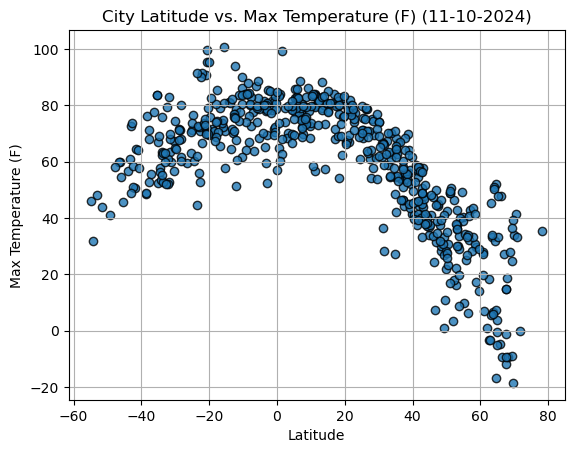

In [35]:
# Building a scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (F) (11-10-2024)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Max Temperature")

# Show plot
plt.show()

#### Latitude Vs. Humidity

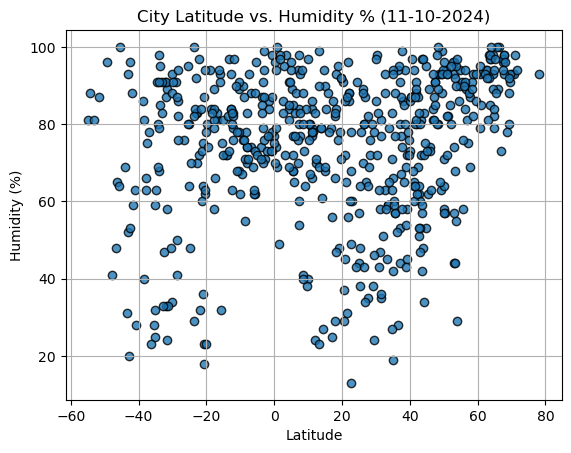

In [36]:
# Building the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity % (11-10-2024)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

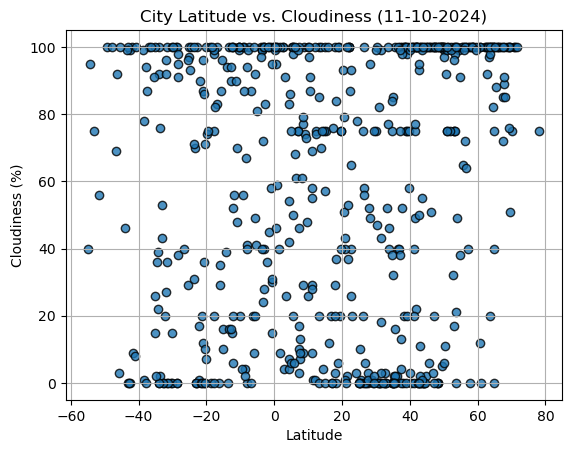

In [37]:
# Building the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (11-10-2024)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

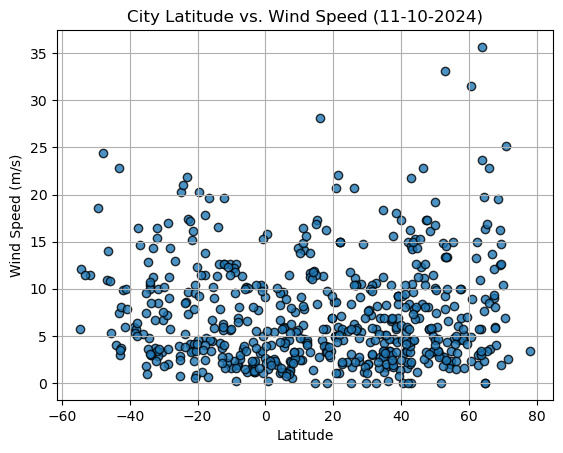

In [38]:
# Building the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (11-10-2024)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind Speed")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [39]:
# Defining a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_file):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-", label=f"y={slope:.2f}x + {intercept:.2f}")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Displaying the r-squared value
    plt.text(0.5, 0.05, f"y = {slope:.2f}x + {intercept:.2f}", transform=plt.gca().transAxes, color= "red", fontsize=16, fontweight='bold')
    
    
    # Save the plot
    plt.savefig(output_file)
    
    # Show the plot
    #print(f"y= {slope:.2f}x + {intercept:.2f}")
    print(f"The r^2-value is: {rvalue**2:.6f}")
    plt.show()

In [40]:
# Creating a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Displaying sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,56.55,65,100,3.44,US,1731377142
2,bubaque,11.2833,-15.8333,83.88,66,69,7.83,GW,1731377145
3,hasaki,35.7333,140.8333,66.78,57,100,1.68,JP,1731377146
4,thunder bay,48.4001,-89.3168,28.38,80,0,5.75,CA,1731376796
8,kapa'a,22.0752,-159.3190,79.12,88,100,14.97,US,1731377152


In [41]:
# Creating a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Displaying sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ta`u,-14.2336,-169.5144,81.30,72,39,11.36,AS,1731377144
5,hermanus,-34.4187,19.2345,57.79,80,22,4.74,ZA,1731377149
6,waitangi,-43.9535,-176.5597,56.82,69,46,4.00,NZ,1731377150
7,port-vila,-17.7338,168.3219,85.60,58,75,11.50,VU,1731377151
9,uturoa,-16.7333,-151.4333,79.11,81,83,19.66,PF,1731377153


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.736389


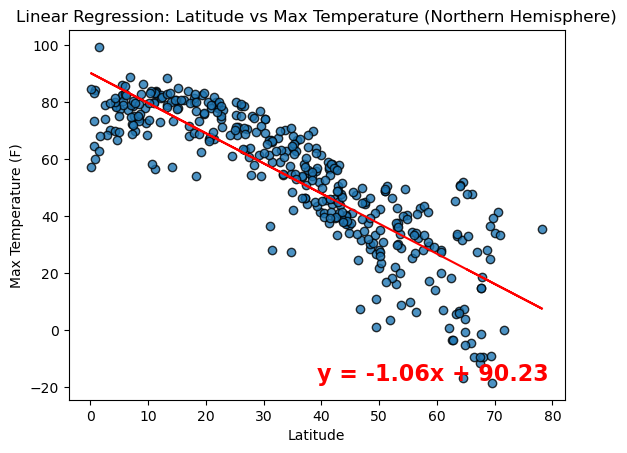

In [42]:
# Linear regression on Northern Hemisphere
# Defining the x and y values for the linear regression (Latitude vs Max Temperature)

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Linear Regression: Latitude vs Max Temperature (Northern Hemisphere)", "Max Temp Northern Hemisphere")


The r^2-value is: 0.354176


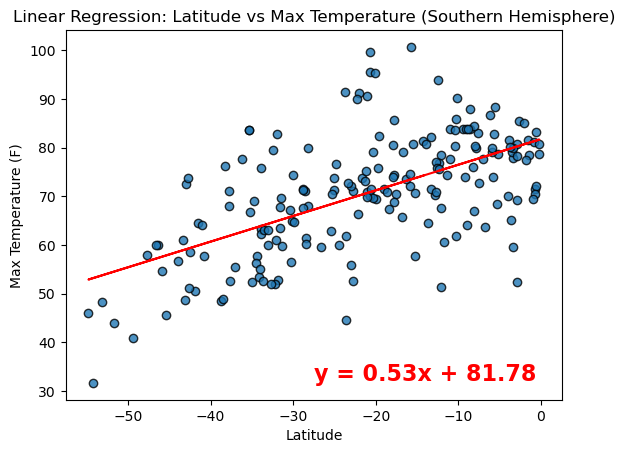

In [43]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (F)", "Linear Regression: Latitude vs Max Temperature (Southern Hemisphere)", "Max Temp Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemipshere we can see that the more latitude there is the lower the temperature it will be; meanwhile in the Southern Hempishere is the opposite, the more latitude there is the greater the temperature there will be.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.054066


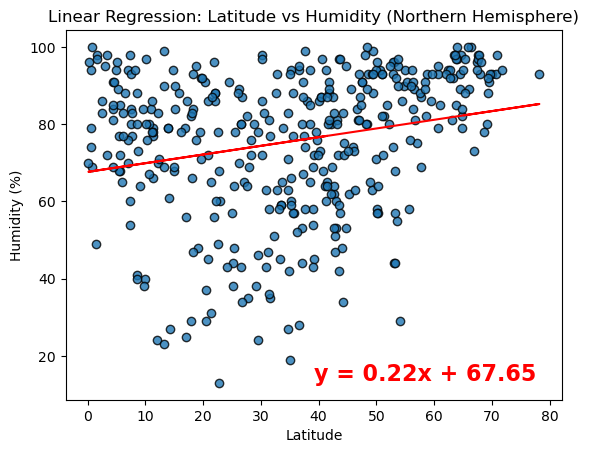

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Linear Regression: Latitude vs Humidity (Northern Hemisphere)", "Humidity Northern Hemisphere")

The r^2-value is: 0.054257


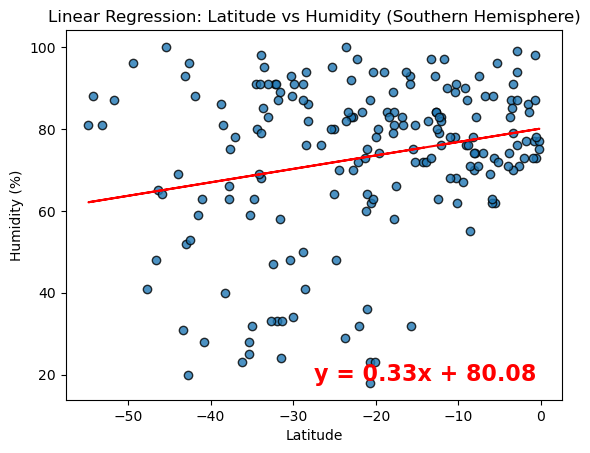

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Linear Regression: Latitude vs Humidity (Southern Hemisphere)", "Humidity Southern Hemisphere")

**Discussion about the linear relationship:** While the latitude may be different the Humidity remains almost the same in both the Northern and the Southern Hemisphers. The Humidity increases in both as the latitude increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.058898


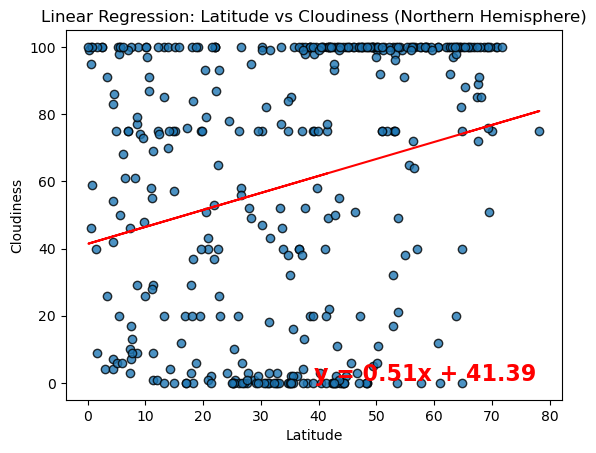

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Linear Regression: Latitude vs Cloudiness (Northern Hemisphere)", "Cloudiness Northern Hemisphere")

The r^2-value is: 0.004856


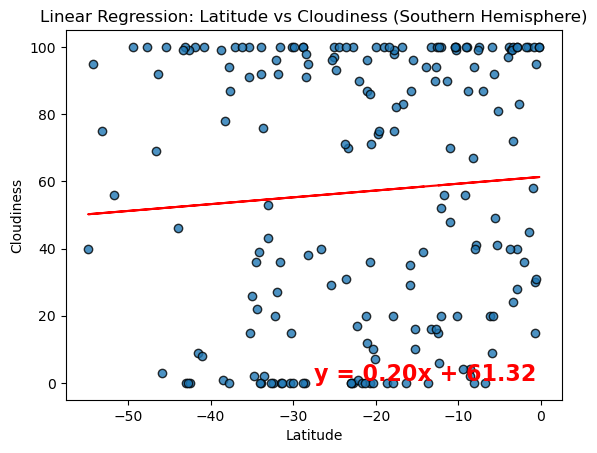

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Linear Regression: Latitude vs Cloudiness (Southern Hemisphere)", "Cloudiness Southern Hemisphere")

**Discussion about the linear relationship:** While the latitude may be different the Cloudiness remains almost the same in both the Northern and the Southern Hemisphers. The Cloudiness increases in both as the latitude increases, although in the Northrn Hemipshere tends to be a little bit more cloudy.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.033557


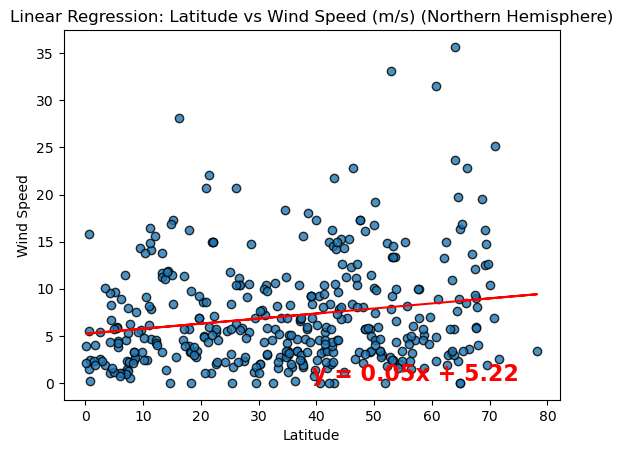

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Linear Regression: Latitude vs Wind Speed (m/s) (Northern Hemisphere)", "Wind Speed Northern Hemisphere")

The r^2-value is: 0.050810


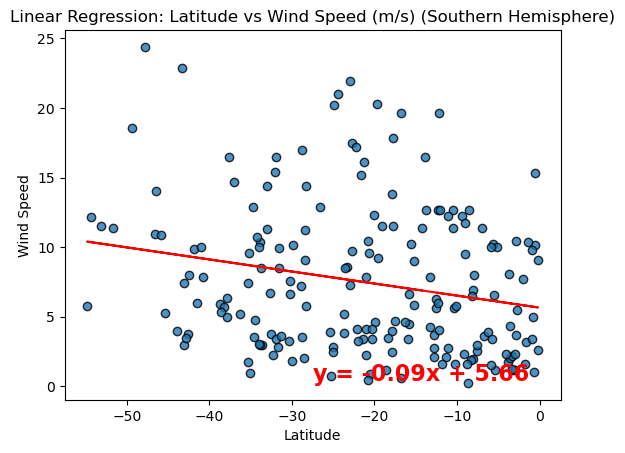

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Linear Regression: Latitude vs Wind Speed (m/s) (Southern Hemisphere)", "Wind Speed Southern Hemisphere")

**Discussion about the linear relationship:** In the Northern Hemisphere the more Latitude there is the more windy it becomes. While in the Southern Hemipshere the more Latitude there is the wind starts to drop its speed.